# Initial Exploratory Data Analysis (EDA)

In this section, we will perform an initial exploratory data analysis (EDA) on the TMDB movie dataset. This includes loading the dataset, cleaning the data, and visualizing key features to understand the distribution and relationships within the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [5]:
df = pd.read_csv("./data/TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Cleaning and Extracting Relevant Features

In [6]:
df = df[["id", "title", "vote_average", "vote_count", "release_date", "adult", "overview", "genres", "keywords", "poster_path"]]

In [7]:
df.isna().sum()

id                   0
title               13
vote_average         0
vote_count           0
release_date    202010
adult                0
overview        242810
genres          475846
keywords        858466
poster_path     376408
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,id,title,vote_average,vote_count,release_date,adult,overview,genres,keywords,poster_path
0,27205,Inception,8.364,34495,2010-07-15,False,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,32571,2014-11-05,False,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,30619,2008-07-16,False,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,29815,2009-12-15,False,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,29166,2012-04-25,False,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


## Visualizing rating distributions

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


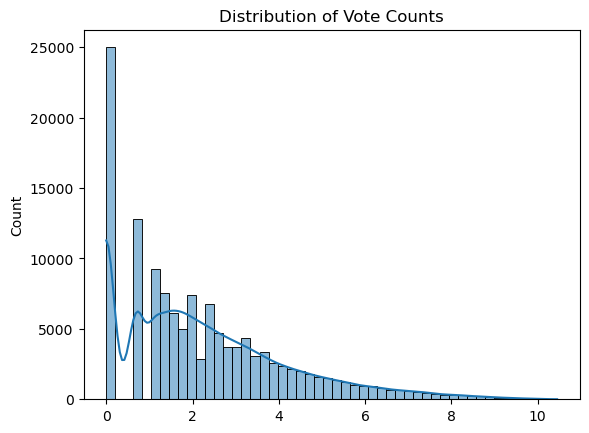

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["vote_count"] > 0]
log_vote_count = np.log(df["vote_count"])
sns.histplot(log_vote_count, bins=50, kde=True)
plt.title("Distribution of Vote Counts")
plt.xlabel("")
plt.show()

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


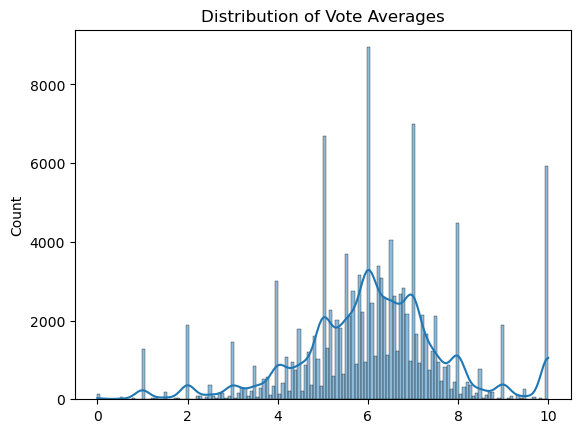

In [11]:
sns.histplot(df["vote_average"], kde=True)
plt.title("Distribution of Vote Averages")
plt.xlabel("")
plt.show()

In [12]:
df["vote_average"].describe()

count    131270.000000
mean          6.118888
std           1.682144
min           0.000000
25%           5.200000
50%           6.100000
75%           7.000000
max          10.000000
Name: vote_average, dtype: float64

In [13]:
df.to_csv("./data/movie_data_v1.csv")

In [14]:
df = pd.read_csv("./data/movie_data_v1.csv")
df = df.drop(columns=["Unnamed: 0", "overview", "adult"])


In [15]:
m = df["vote_count"].quantile(0.95)

In [16]:
m

470.0

In [17]:
df = df[df["vote_count"] >= m]
df

,id,title,vote_average,vote_count,release_date,genres,keywords,poster_path
0,27205,Inception,8.364,34495,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,32571,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,30619,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,29815,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,29166,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg
...,...,...,...,...,...,...,...,...
6563,664300,Shiva Baby,7.177,470,2021-04-02,"Comedy, Drama","new york city, parent child relationship, ex-g...",/5IBJwMPSCS5XdRT7BO1ZMreFOis.jpg
6564,8850,The Shadow,6.029,470,1994-07-01,"Adventure, Fantasy, Action, Thriller, Science ...","new york city, atomic bomb, superhero, ladykil...",/xAbFJH3vQYZvUyzzGAtG4OLy492.jpg
6565,10173,Marked for Death,6.071,470,1990-10-05,"Action, Crime","voodoo, cop, murder, family",/xYaetJsSm5FC1zxhdW8UR1NVXzc.jpg
6566,11630,3 Men and a Little Lady,5.779,470,1990-11-21,"Family, Comedy","daughter, marriage proposal, london, england",/4VWWEnhX0zddRKwZWGtIdDcV5U7.jpg


## Feature Engineering

Using IMDB"s weighted rating we can get a more statistically significant value to quantify each movie"s ratings.

In [18]:
C = df["vote_average"].mean()
def weighted_score(df):
    v = df["vote_count"]
    R = df["vote_average"]

    return ((v/(v+m)) * R) + ((m/(v+m)) * C)

In [19]:
df["weighted_rating"] = df.apply(weighted_score, axis=1)
df["weighted_rating"]

0       8.341675
1       8.392621
2       8.484654
3       7.559500
4       7.694032
          ...   
6563    6.940063
6564    6.366063
6565    6.387063
6566    6.241063
6567    6.609063
Name: weighted_rating, Length: 6568, dtype: float64

In [20]:
df = df.drop(columns=["vote_average", "vote_count"])

In [21]:
df.head()

,id,title,release_date,genres,keywords,poster_path,weighted_rating
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,8.341675
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,8.392621
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,8.484654
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,7.559500
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,7.694032


In [22]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_year"]
df = df.drop(columns=["release_date"])
df.head()

,id,title,genres,keywords,poster_path,weighted_rating,release_year
0,27205,Inception,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,8.341675,2010
1,157336,Interstellar,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,8.392621,2014
2,155,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,8.484654,2008
3,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,7.559500,2009
4,24428,The Avengers,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,7.694032,2012


## Word2Vec implementation for Genres and Keywords
In this project, we use **Word2Vec embeddings** to represent movie genres and keywords as dense vectors. Unlike one-hot encoding, which creates sparse high-dimensional vectors, Word2Vec captures **semantic relationships** between words. This allows the model to learn meaningful connections between movies based on their metadata.

In [23]:
from gensim.models import Word2Vec
import gensim
import re


In [24]:
df["genres"] = df["genres"].str.lower()
df["keywords"] = df["keywords"].str.lower()

In [25]:
def clean_text(text):
    # remove non-alphanumeric characters except delimiter (",")
    text = re.sub(r"[^a-zA-Z0-9,\s]", "", text)
    # remove excessive and trailing whitespace
    text = re.sub(r"\s+", "", text).strip()
    return text

In [26]:
df["genres"] = df["genres"].apply(clean_text)
df["keywords"] = df["keywords"].apply(clean_text)

In [27]:
df["genres"] = df["genres"].astype(str).apply(lambda x: x.split(", "))
df["genres"] = df["genres"].apply(lambda x: x[0].split(",") if isinstance(x, list) and len(x) > 0 else [])
df["keywords"] = df["keywords"].astype(str).apply(lambda x: x.split(", "))
df["keywords"] = df["keywords"].apply(lambda x: x[0].split(",") if isinstance(x, list) and len(x) > 0 else [])
df["keywords"]

0       [rescue, mission, dream, airplane, paris, fran...
1       [rescue, future, spacecraft, raceagainsttime, ...
2       [joker, sadism, chaos, secretidentity, crimefi...
3       [future, society, cultureclash, spacetravel, s...
4       [newyorkcity, superhero, shield, basedoncomic,...
                              ...                        
6563    [newyorkcity, parentchildrelationship, exgirlf...
6564    [newyorkcity, atomicbomb, superhero, ladykille...
6565                        [voodoo, cop, murder, family]
6566        [daughter, marriageproposal, london, england]
6567    [friendship, boardingschool, suspicion, facetr...
Name: keywords, Length: 6568, dtype: object

In [28]:
df.iloc[0]["keywords"]

['rescue',
 'mission',
 'dream',
 'airplane',
 'paris',
 'france',
 'virtualreality',
 'kidnapping',
 'philosophy',
 'spy',
 'allegory',
 'manipulation',
 'carcrash',
 'heist',
 'memory',
 'architecture',
 'losangeles',
 'california',
 'dreamworld',
 'subconscious']

In [29]:
df.iloc[0]["genres"]

['action', 'sciencefiction', 'adventure']

In [30]:
genres = df["genres"].tolist()
keywords = df["keywords"].tolist()
GENRE_VECTOR_SIZE = 8
KEYWORDS_VECTOR_SIZE = 32
w2v_genre = Word2Vec(sentences=genres, 
                     vector_size=GENRE_VECTOR_SIZE,
                     window=3,
                     min_count=1,
                     sg=1)

w2v_keywords = Word2Vec(sentences=keywords,
                        vector_size=KEYWORDS_VECTOR_SIZE,
                        window=5,
                        min_count=1,
                        sg=1)

In [31]:
def get_average_embedding(words, model, vector_size):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [32]:
df["genre_embedding"] = df["genres"].apply(lambda words: get_average_embedding(words, w2v_genre, GENRE_VECTOR_SIZE))
df["keywords_embedding"] = df["keywords"].apply(lambda words: get_average_embedding(words, w2v_keywords, KEYWORDS_VECTOR_SIZE))

In [33]:
df["genre_embedding"]

0       [0.08384516, -0.6285359, 0.34933636, 0.807338,...
1       [0.05295944, -0.61504966, 0.38225865, 0.822461...
2       [0.08609398, -0.5338882, 0.30272892, 0.784436,...
3       [0.054809272, -0.66189617, 0.37874794, 0.80243...
4       [0.08384516, -0.6285359, 0.34933636, 0.807338,...
                              ...                        
6563    [-0.017637527, -0.61551416, 0.46697986, 0.8282...
6564    [0.063366875, -0.6520842, 0.35520887, 0.778352...
6565    [0.108667985, -0.47558907, 0.25893986, 0.77938...
6566    [-0.039404333, -0.617654, 0.5016592, 0.8179377...
6567    [0.029442657, -0.57153875, 0.43198326, 0.89696...
Name: genre_embedding, Length: 6568, dtype: object

In [34]:
df["keywords_embedding"]

0       [-0.07221388, -0.56831807, 0.5414866, 0.290893...
1       [0.08089591, -0.5319732, 0.34761938, 0.2058959...
2       [0.062550694, -0.65358645, 0.4326236, 0.267261...
3       [0.120075665, -0.5733722, 0.35534117, 0.232546...
4       [0.19797887, -0.8315805, 0.42757395, 0.4173608...
                              ...                        
6563    [0.05734138, -0.397369, 0.3080969, 0.2477567, ...
6564    [0.020618025, -0.5592035, 0.38274145, 0.261017...
6565    [0.104117766, -0.6312053, 0.4417621, 0.1893522...
6566    [-0.12795997, -0.5140283, 0.63558275, 0.470058...
6567    [0.038195085, -0.54104733, 0.4678725, 0.290187...
Name: keywords_embedding, Length: 6568, dtype: object

In [35]:
df = df.drop(columns=["genres", "keywords"])
df.head()

,id,title,poster_path,weighted_rating,release_year,genre_embedding,keywords_embedding
0,27205,Inception,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,8.341675,2010,"[0.08384516, -0.6285359, 0.34933636, 0.807338,...","[-0.07221388, -0.56831807, 0.5414866, 0.290893..."
1,157336,Interstellar,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,8.392621,2014,"[0.05295944, -0.61504966, 0.38225865, 0.822461...","[0.08089591, -0.5319732, 0.34761938, 0.2058959..."
2,155,The Dark Knight,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,8.484654,2008,"[0.08609398, -0.5338882, 0.30272892, 0.784436,...","[0.062550694, -0.65358645, 0.4326236, 0.267261..."
3,19995,Avatar,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,7.559500,2009,"[0.054809272, -0.66189617, 0.37874794, 0.80243...","[0.120075665, -0.5733722, 0.35534117, 0.232546..."
4,24428,The Avengers,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,7.694032,2012,"[0.08384516, -0.6285359, 0.34933636, 0.807338,...","[0.19797887, -0.8315805, 0.42757395, 0.4173608..."


In [36]:
def bin_year(year):
  if year < 1950:
    return "pre-1950"
  elif year < 1960:
    return "1950s"
  elif year < 1970:
    return "1960s"
  elif year < 1980:
    return "1970s"
  elif year < 1990:
    return "1980s"
  elif year < 2000:
    return "1990s"
  elif year < 2010:
    return "2000s"
  elif year < 2020:
    return "2010s"
  else:
    return "2020s"
  
df["release_year"] = df["release_year"].apply(bin_year)

In [37]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

ratings_scaled = scaler.fit_transform(df[["weighted_rating"]])
genre_embed = np.array(df["genre_embedding"].tolist())
keyword_embed = np.array(df["keywords_embedding"].tolist())
year_encoded = ohe.fit_transform(df[["release_year"]])

In [38]:
features = np.hstack([ratings_scaled, genre_embed, keyword_embed, year_encoded])

In [46]:
model = NearestNeighbors(n_neighbors=6, metric="cosine")
model.fit(features)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [11]:
distances, indices = model.kneighbors([features[26]])
recommended = df.iloc[indices[0][1:]]["title"].tolist()
recommended

['Venom', 'Ant-Man', 'Shazam!', 'Iron Man 2', 'Reign of the Supermen']

In [48]:
df[["title", "poster_path"]].to_csv("./data/indexed_movies.csv")

In [49]:
np.save("./data/features.npy", features)

In [50]:
df.drop(columns=["title", "poster_path", "id"]).to_csv("./data/movies_metadata.csv")

In [52]:
with open("./data/model.pkl", "wb") as file:
  pickle.dump(model, file)


In [1]:
import pickle
with open("./data/model.pkl", "rb") as file:
  model = pickle.load(file)

In [4]:
features = np.load("./data/features.npy")

In [8]:
df = pd.read_csv("./data/indexed_movies.csv")